# Question 2

##### 2.1 Read the data in the set into a DataFrame and display the first 15 rows of the data set. You should also display a general overview of the data set by determining the dimensions of the data set.

(2 Marks)

In [1]:
import pandas as pd
import re

data = pd.read_csv('./data/Books_Data.csv', delimiter=';')
print(data.head(15))
print("Lenght, Width: ", data.shape)

    index  Publishing Year                                Book Name  \
0       0           1975.0                                  Beowulf   
1       1           1987.0                         Batman: Year One   
2       2           2015.0                        Go Set a Watchman   
3       3           2008.0          When You Are Engulfed in Flames   
4       4           2011.0                 Daughter of Smoke & Bone   
5       5           2015.0                                Red Queen   
6       6           2011.0                       The Power of Habit   
7       7           1994.0  Midnight in the Garden of Good and Evil   
8       8           2012.0                                 Hopeless   
9       9           1905.0                        A Little Princess   
10     10           2004.0                  The Truth About Forever   
11     11           1954.0                    The horse and his boy   
12     12           2010.0                          Last Sacrifice    
13    

##### 2.2 A standard naming convention is required for all the column names. As such, it was decided that all columns should be written in camel case. Examine all column names and rename those that do not use the specified naming convention.

(5 Marks)

In [2]:
print("\nColumn names:\n", data.columns)
new_names = []
for name in data.columns:
    words = re.split(r'\W|_', name)  
    if words: 
        new_name = words[0].lower() + ''.join(s.title() for s in words[1:])
        new_names.append(new_name)
    else:
        new_names.append(name)

data.columns = new_names
print("\nNew Column names:\n", data.columns)


Column names:
 Index(['index', 'Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold'],
      dtype='object')

New Column names:
 Index(['index', 'publishingYear', 'bookName', 'author', 'languageCode',
       'authorRating', 'bookAverageRating', 'bookRatingsCount', 'genre',
       'grossSales', 'publisherRevenue', 'salePrice', 'salesRank', 'publisher',
       'unitsSold'],
      dtype='object')


##### 2.3 Some rows in the data set are empty. Identify and remove all rows with empty values and display a count of the rows removed.

(4 Marks)

In [3]:
cleaned_data = data.dropna()
print("\nNumber of rows removed: ", data.shape[0] - cleaned_data.shape[0], "\n")


Number of rows removed:  74 



##### 2.4 The Author rating column needs to have only 3 distinct values (Beginner, Intermediate, and Expert) and the genre column should only have 3 distinct values (Non-Fiction, Fiction, and Children). Alter the dataframe so that these specifications are reflected.

In [4]:
rating_dict = {'Novice': 'Beginner', 'Famous': 'Advanced', 'Excellent': 'Advanced'}
cleaned_data['authorRating'] = cleaned_data['authorRating'].replace(to_replace=rating_dict)
print("Author Rating:\n", cleaned_data['authorRating'])


genre_dict = {'genre fiction': 'Fiction', 'fiction': 'Fiction', 'nonfiction': 'Non-Fiction', 'children': 'Childern'}
cleaned_data['genre'] = cleaned_data['genre'].replace(to_replace=genre_dict)
print("Genre:\n", cleaned_data['genre'])


Author Rating:
 0           Beginner
1       Intermediate
2           Beginner
3       Intermediate
4       Intermediate
            ...     
1065    Intermediate
1066        Advanced
1067    Intermediate
1068        Advanced
1069        Advanced
Name: authorRating, Length: 996, dtype: object
Genre:
 0           Fiction
1           Fiction
2           Fiction
3           Fiction
4           Fiction
           ...     
1065    Non-Fiction
1066        Fiction
1067        Fiction
1068        Fiction
1069        Fiction
Name: genre, Length: 996, dtype: object


C:\Users\nicol\AppData\Local\Temp\ipykernel_5284\3681968665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['authorRating'] = cleaned_data['authorRating'].replace(to_replace=rating_dict)
C:\Users\nicol\AppData\Local\Temp\ipykernel_5284\3681968665.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['genre'] = cleaned_data['genre'].replace(to_replace=genre_dict)


##### 2.5 Create a new DataFrame, that contains only the books where the book rating is greater or equal to 4 and display the top 10 books with the highest ratings in descending order.

(5 Marks)

In [5]:
highly_rated = cleaned_data[cleaned_data['bookAverageRating']>4]
print("\nTop 10 Highest Rated Books:\n", highly_rated.sort_values(by='bookAverageRating', ascending=False)[:10], '\n')


Top 10 Highest Rated Books:
      index  publishingYear                                           bookName  \
331    331          2014.0                                  Words of Radiance   
777    777          2016.0                           A Court of Mist and Fury   
479    479          1988.0  The Essential Calvin and Hobbes: A Calvin and ...   
31      31          2010.0                                   The Way of Kings   
249    249          1987.0                                  Calvin and Hobbes   
733    733          2015.0                                   Queen of Shadows   
433    433          1973.0               The Hobbit and The Lord of the Rings   
965    965          2000.0           A Storm of Swords: Part 2 Blood and Gold   
153    153          2013.0                                 The House of Hades   
491    491          2014.0                                       Heir of Fire   

                           author languageCode authorRating  \
331            

##### 2.6 Create a new column in the original DataFrame named “operatingCost” that shows the cost involved in the publishing of a certain book (defined by the formula: grossSales – publisherRevenue). Remove the “salesRank”column from the DataFrame.

(5 Marks)

In [6]:
operating_cost = cleaned_data['grossSales'] - cleaned_data['publisherRevenue']
cleaned_data['operatingCost'] = operating_cost
print('Operating Cost:\n', cleaned_data['operatingCost'])

cleaned_data = cleaned_data.drop(['salesRank'], axis=1)

Operating Cost:
 0       13664.000
1        4975.000
2       19118.000
3       16500.000
4       15181.000
          ...    
1065       41.976
1066      338.776
1067      338.776
1068       41.976
1069      316.940
Name: operatingCost, Length: 996, dtype: float64


C:\Users\nicol\AppData\Local\Temp\ipykernel_5284\4014006514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['operatingCost'] = operating_cost


##### 2.7 Calculate the average book rating for each distinct publisher.

(3 Marks)


In [7]:
average_ratings = cleaned_data.groupby('publisher')['bookAverageRating'].mean().reset_index()
print('\nPublisher Average Book Ratings:\n', average_ratings)


Publisher Average Book Ratings:
                               publisher  bookAverageRating
0        Amazon Digital Services,  Inc.           4.001661
1                   Hachette Book Group           3.944821
2    HarperCollins Christian Publishing           4.170000
3              HarperCollins Publishers           3.995846
4              HarperCollins Publishing           4.130000
5                             Macmillan           4.000000
6               Penguin Group (USA) LLC           4.044583
7                      Random House LLC           3.981727
8  Simon and Schuster Digital Sales Inc           4.040727


##### 2.8 Calculate the mean, median, and standard deviation for the “grossSales” column.

(3 Marks)

In [8]:
gross_sales_mean = cleaned_data['grossSales'].mean()
gross_sales_median = cleaned_data['grossSales'].median()
gross_sales_std = cleaned_data['grossSales'].std()

print(f'Gross Sales Mean: {gross_sales_mean:.2f}')
print(f'Gross Sales Median: {gross_sales_median:.2f}')
print(f'Gross Sales Standard Deviation: {gross_sales_std:.2f}')


Gross Sales Mean: 1885.28
Gross Sales Median: 797.92
Gross Sales Standard Deviation: 4027.29


##### 2.9 The ‘publishing year’ columns has values that are not correctly showing. Trim out the extra characters so that only a proper year is show (i.e. if year is ‘1975.0’, change it to ‘1975’. You will also notice that the are some values in this column that are incorrect (values such as ‘-300’. Identify these rows and remove all rows containing incorrect dates.

(5 Marks)

In [9]:
cleaned_data['publishingYear'] = cleaned_data['publishingYear'].astype(int)
print("\nPublication Year:\n", cleaned_data['publishingYear'])


valid_years = (cleaned_data['publishingYear']>=0) & (cleaned_data['publishingYear']<2025)
cleaned_data = cleaned_data[valid_years]
print('\nCleaned Data Frame:\n', cleaned_data)


Publication Year:
 0       1975
1       1987
2       2015
3       2008
4       2011
        ... 
1065    2014
1066    1989
1067    1930
1068    2011
1069    1999
Name: publishingYear, Length: 996, dtype: int32

Cleaned Data Frame:
       index  publishingYear                         bookName  \
0         0            1975                          Beowulf   
1         1            1987                 Batman: Year One   
2         2            2015                Go Set a Watchman   
3         3            2008  When You Are Engulfed in Flames   
4         4            2011         Daughter of Smoke & Bone   
...     ...             ...                              ...   
1065   1065            2014                    Gray Mountain   
1066   1066            1989                 The Power of One   
1067   1067            1930               The Maltese Falcon   
1068   1068            2011                       Night Road   
1069   1069            1999                         Tripwire   

# Question 3


##### a. What are the 10 highest rated books?

(2 Marks)

In [10]:
import matplotlib.pyplot as plt
import numpy as np


In [11]:
top_10 = (highly_rated
          .sort_values(by='bookAverageRating', ascending=False)[:10][::-1]
)

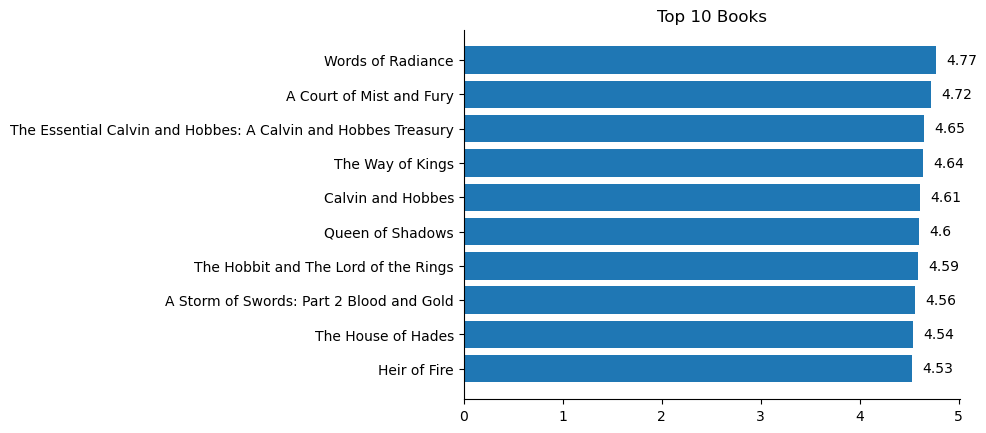

In [35]:
fig, ax = plt.subplots()

ax.barh(top_10["bookName"], top_10["bookAverageRating"]);

ax.set_title("Top 10 Books");

bars = ax.patches
labels = top_10["bookAverageRating"]
for bar, label in zip(bars, labels):
    width = bar.get_width()  # Get width of the bar
    ax.text(
       width + 0.1,  # Adjust the x-position of the label
       bar.get_y() + bar.get_height() / 2,  # Set y-position to center of the bar
       label,  # Text label
       ha="left",  # Horizontal alignment
       va="center"  # Vertical alignment
    )

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

We uses a horizontal bar graph to show the top 10 highest rated books
Since it is easy to determine a diference in length, even the smallest difference is noticable

In this graph it is clear that the top ten highset rated books are shown. 

##### b. How are sales distributed across book genres?

(4 Marks)

In [13]:
sales_by_genre = (cleaned_data
                  .groupby(cleaned_data["genre"])
                  .agg({"grossSales": "sum"})
                  )

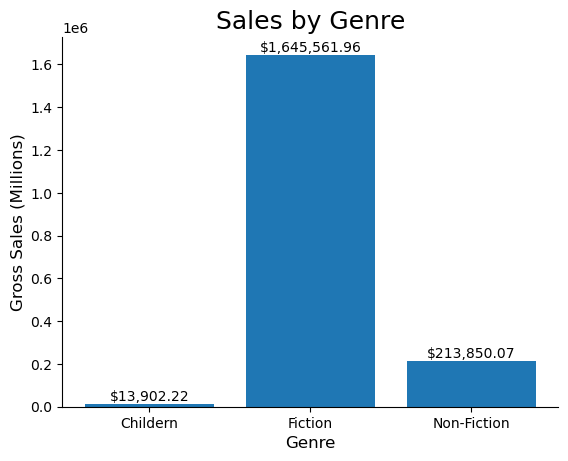

In [26]:
fig, ax = plt.subplots()

ax.bar(
    sales_by_genre.index,
    sales_by_genre["grossSales"]
)

ax.set_title("Sales by Genre", fontdict={"size": 18})
ax.set_xlabel("Genre", fontdict={"size":  12})
ax.set_ylabel("Gross Sales (Millions)", fontdict={"size":  12})
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

bars = ax.patches
labels = sales_by_genre["grossSales"]
for bar, label in zip(bars, labels):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, height + 5, f"${label:,.2f}", ha="center", va="bottom"
    )

We use a verticl bar chart to show value/volume per category, as is in this case. 

From this graph we can see that fiction is by far the genre genereting the most revenue.

##### c. How have sales in the fiction genre progressed over the years?

(4 Marks)

In [ ]:
fiction_years = (cleaned_data
                 .loc[cleaned_data["genre"]=="Fiction"]
                 .groupby(cleaned_data["publishingYear"])
                 .agg({"grossSales": "sum"})
                 .sort_values("publishingYear", ascending=True)
                 )


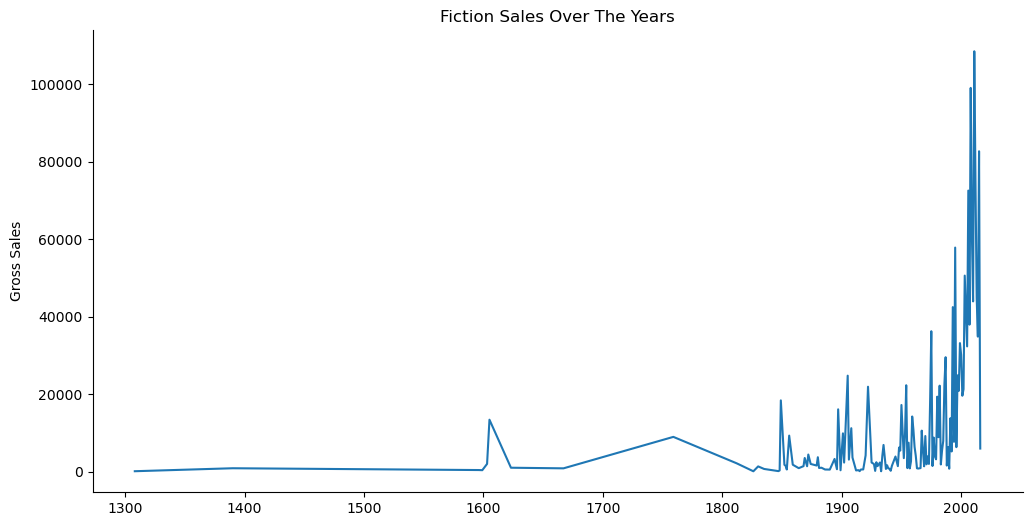

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(
    fiction_years.index,
    fiction_years["grossSales"]
);

ax.set_title("Fiction Sales Over The Years");
ax.set_ylabel("Gross Sales")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

In [ ]:
anomoly = (cleaned_data
           .loc[cleaned_data["publishingYear"]==1605]
)
anomoly

,index,publishingYear,bookName,author,languageCode,authorRating,bookAverageRating,bookRatingsCount,genre,grossSales,publisherRevenue,salePrice,publisher,unitsSold,operatingCost
66,66,1605,Don Quijote de La Mancha,"Miguel de Cervantes Saavedra, Roberto GonzÃ¡le...",eng,Intermediate,3.85,134931.0,Fiction,13413.08,8047.848,8.99,Hachette Book Group,1492.0,5365.232


Time series data is typically plotted on a line graph. The x-axis represents the time period, and the y-axis represents the Gross sales per year
It is important to note that the data provided does not inclued any other time series data. 
The data assumes that all sales per book is made in the same year it is released. 
Therfore the graph is not an accurate reflection of sales in the fiction genre over time, since it is perfectly reasonable that many fiction books may only sell well many years after the release.

Note one outlier: In 1605 the book 'Don Quijote de La Mancha' was released.
A quick google search labels this book as one of the greatest peieces of literature ever written, and sold millions worldwide.

##### d. What percentage of all sales are attributed to each of the various publishers?

(4 Marks)

In [ ]:
pub_sales_pcnt = (cleaned_data
                  .groupby(cleaned_data["publisher"])
                  .agg({"grossSales": "sum"})
                  .sort_values("grossSales", ascending=False)
                  .apply(lambda x: x * 100 / sum(x))
                  )

pie_data = (pd.concat([pub_sales_pcnt.iloc[:6], 
                       pd.DataFrame(
                           {
                               "grossSales": pub_sales_pcnt.iloc[6:, 0].sum()
                           }
                           , index=["Other"])]
                     )
           ).iloc[::-1]

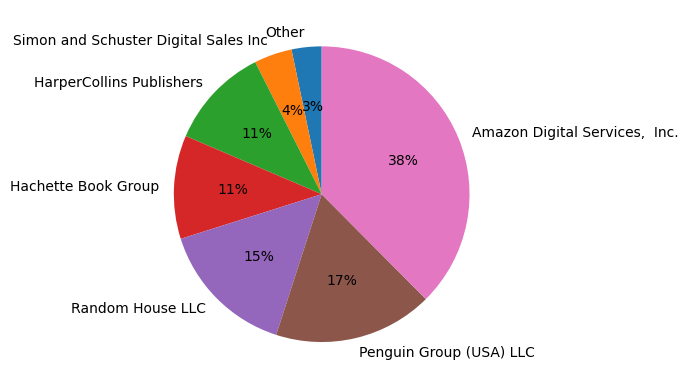

In [ ]:
fig, ax = plt.subplots()

ax.pie(
    pie_data["grossSales"],
    startangle=90,
    labels=pie_data.index,
    autopct="%.0f%%"
);

although not a rule, percentages are typically plotted on a pie chart.
in this case I displayed the top 6 publishers by revenue, and consolidated all other  publishers into "Other". 
It is best to avoid to many pie peices as it can become overwhelming.

##### e. How are the sales distributed across the different genres for the highest selling publisher? Is there a correlation between this distribution and the overall distribution of sales across genres?

(8 Marks)

In [ ]:
big_publisher = (cleaned_data
                 .loc[cleaned_data["publisher"]=="Amazon Digital Services,  Inc."]
                 .groupby(["genre"])
                 .agg({"grossSales": "sum"})
                 .sort_values("grossSales", ascending=False)
)

all_publisher = (cleaned_data
                 .loc[cleaned_data["publisher"]!="Amazon Digital Services,  Inc."]
                 .groupby(["genre"])
                 .agg({"grossSales": "sum"})
                 .sort_values("grossSales", ascending=False)
)

In [ ]:
#all_publisher
big_publisher

,grossSales
genre,
Fiction,631578.60
Non-Fiction,60508.61
Childern,11374.05


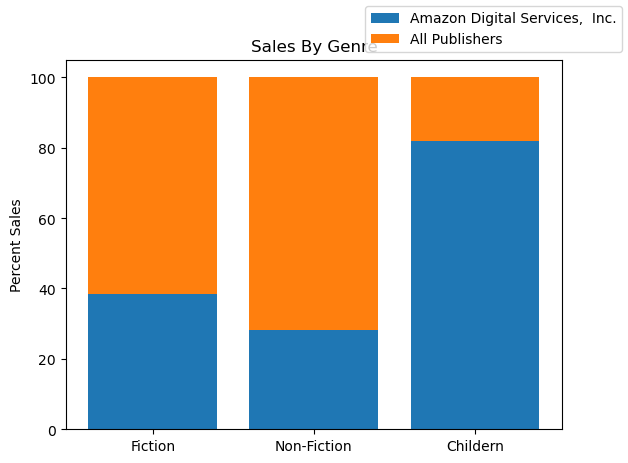

In [ ]:
fig, ax = plt.subplots()

genres = ["Fiction", "Non-Fiction","Children"]

ax.bar(
    big_publisher.index,
    big_publisher["grossSales"] /(big_publisher["grossSales"]+all_publisher["grossSales"]) *100,
    label="Amazon Digital Services,  Inc."
)

bars = ax.patches
labels = genres
for bar, label in zip(bars, labels):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2, height + 5, f"${label:,.2f}", ha="center", va="bottom"
    )

ax.bar(
    all_publisher.index,
    all_publisher["grossSales"] /(big_publisher["grossSales"]+all_publisher["grossSales"]) *100,
    label="All Publishers",
    bottom=big_publisher["grossSales"]/(big_publisher["grossSales"]+all_publisher["grossSales"]) *100
)

ax.set_title("Sales By Genre");
ax.set_ylabel("Percent Sales")

fig.legend();



from the previous pie chart we can determine that Amazon Digital Services, Inc. is the largest publisher by gross sales. we can now use a stacked bar graph to find a correlation between the largest publishers sales and the sales of all publishers. 

from this graph we can see that there is no correlation between the largest publishers sales and the overall sales per genre.

##### f. Does the rating of a book have any bearing on the sales made from that book?

(4 Marks)

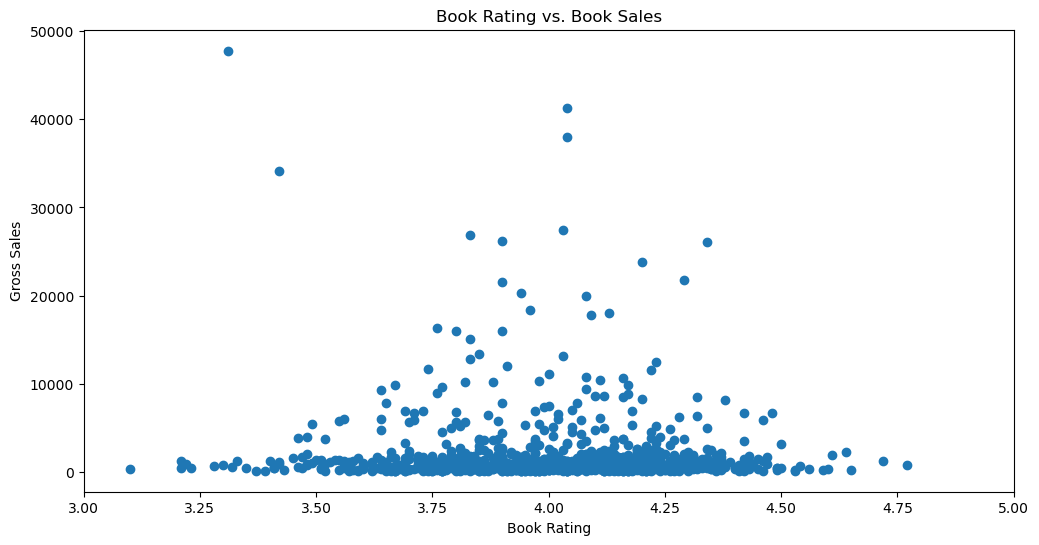

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(
    cleaned_data["bookAverageRating"],
    cleaned_data["grossSales"]
)

ax.set_title("Book Rating vs. Book Sales");
ax.set_xlabel("Book Rating")
ax.set_ylabel("Gross Sales")
ax.set_xbound(3,5)

to find a potential correlation between 2 variables we use a scatter plot.

here I have plotted book rating and gross sales.
from the graph we can see that there is no correlation between them.

we can conclude that an average book (considered to have a rating of about 4) will sell well since it appels to a larger audience. the average persons reading age is only around 9-11 years. higher rated books will require a higher reading age of the reader and so wont sell to the masses, because it's too difficult to read.


##### g. Is there a relationship between the rating a book receives and the rating the author of the book receives.

(4 Marks)

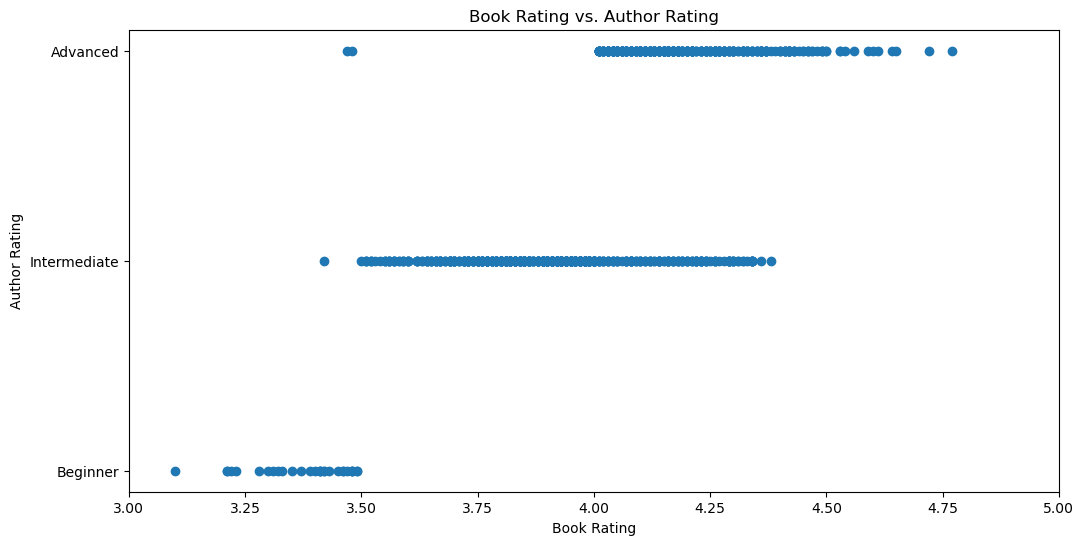

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(
    cleaned_data["bookAverageRating"],
    cleaned_data["authorRating"]
)

ax.set_title("Book Rating vs. Author Rating");
ax.set_xlabel("Book Rating")
ax.set_ylabel("Author Rating")
ax.set_xbound(3,5)

to find a potential correlation between 2 variables we use a scatter plot.

here i have plotted Book Rating to Author Rating
we can see quite clearly that the more advanced the author is, the higher their books are rated. 